# DS636 Midterm Exam

* This midterm exam has 2.5 hours from 6pm to 8:30pm.
* This exam is to mimic the real world project and to test how you solve problems by what you have learnt in this class.
* You should have all your code AND output together on one Jupyter notebook.
* You have 10 problems in 3 groups. Each problem group contains a dataset. Each of them requires you to write short code and provide the result in output. Code without result will only receive half of the marks at the best. 
* You should work independently on the problems. Cheating/copying will get zero.
* At the end, you should upload ipynb format of your notebook. 
* Set up your alarm to 5 minutes before the end time so that you have the last 5 mins to upload files. Email is not acceptable. 

For any canvas issue, please contact the IST Service Desk by calling (973) 596-2900, emailing servicedesk@njit.edu, or visiting servicedesk.njit.edu.


## Submission

Save your file as ipynb file and upload at the end of the exam before deadline.

## Problem Group 1

Use Movies Dataset for this group.


### Question 1
Load the dataset into a dataframe and determine what data type is used to store the `release_year` feature.

In [6]:
# Load the dataset into a dataframe
data <- read.csv("movies.txt", quote = "\"", stringsAsFactors = FALSE)

# Check the data type of the release_year feature
release_year_type <- class(data$release_year)
print(release_year_type)

Warning message in scan(file = file, what = what, sep = sep, quote = quote, dec = dec, :
"EOF within quoted string"


[1] "integer"


### Question 2
Filter your dataset so it contains only `TV Shows`. How many of those TV Shows were rated `TV-Y7`?

In [7]:
# Filter the dataset to contain only TV Shows
tv_shows <- data[data$type == "TV Show", ]

# Count how many TV Shows were rated TV-Y7
tv_y7_count <- sum(tv_shows$rating == "TV-Y7")

print(tv_y7_count)

[1] 31


### Question 3
Further filter your dataset so it only contains TV Shows released between the years 2000 and 2009 inclusive. How many of *those* shows were rated `TV-Y7`?

In [11]:
# Filter the dataset to contain only TV Shows released between 2000 and 2009 (inclusive)
tv_shows_2000s <- tv_shows[tv_shows$release_year >= 2000 & tv_shows$release_year <= 2009, ]

# Count how many TV Shows released between 2000 and 2009 were rated TV-Y7
tv_y7_count_2000s <- sum(tv_shows_2000s$rating == "TV-Y7")

print(tv_y7_count_2000s)


[1] 0


### Question 4
Create a bar plot showing the relative counts of the ratings of TV-Shows released between the years 2000 and 2009, inclusive, as below.
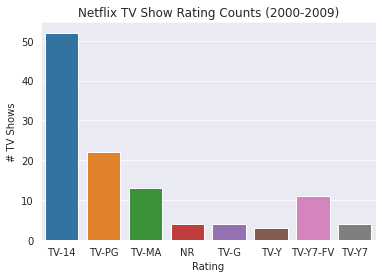

What is the top-most number on the y-axis scale?

[1] 23


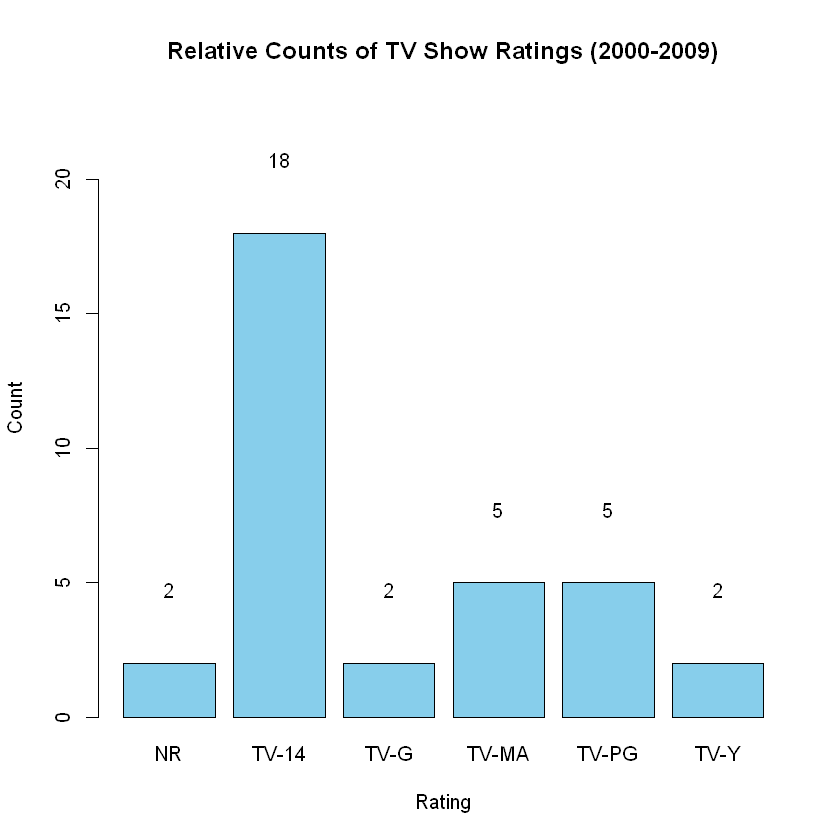

In [14]:
# Filter the dataset to contain only TV Shows released between 2000 and 2009 (inclusive)
tv_shows_2000s <- tv_shows[tv_shows$release_year >= 2000 & tv_shows$release_year <= 2009, ]

# Calculate the counts of each rating category
rating_counts <- table(tv_shows_2000s$rating)

# Create a bar plot
barplot(rating_counts, main = "Relative Counts of TV Show Ratings (2000-2009)", xlab = "Rating", ylab = "Count", col = "skyblue", ylim = c(0, max(rating_counts) + 5))

# Add text labels for the counts on top of each bar
text(barplot(rating_counts, plot = FALSE), rating_counts + 2, labels = rating_counts, pos = 3)

# Get the top-most number on the y-axis scale
top_y_axis_number <- max(rating_counts) + 5
print(top_y_axis_number)


Warning message in scan(file = file, what = what, sep = sep, quote = quote, dec = dec, :
"EOF within quoted string"


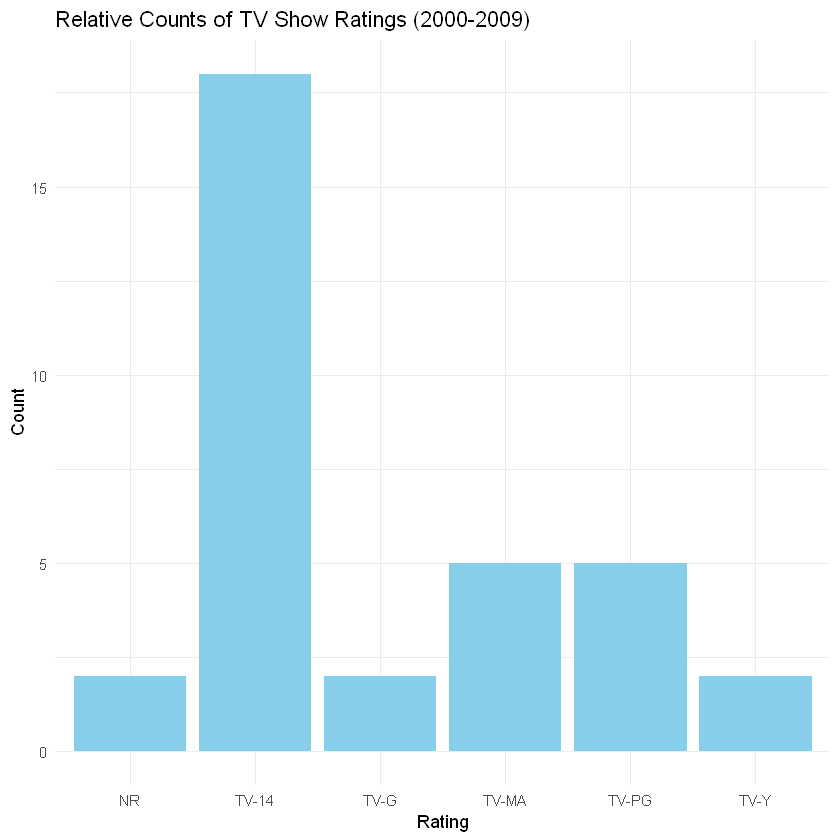

In [61]:
# Load the required library
library(ggplot2)

# Load the dataset
df <- read.csv("movies.txt", stringsAsFactors = FALSE)

# Filter the dataset for TV shows released between 2000 and 2009
df_filtered <- df[df$type == "TV Show" & df$release_year >= 2000 & df$release_year <= 2009, ]

# Create the bar plot
ggplot(df_filtered, aes(x = rating)) +
  geom_bar(fill = "skyblue") +
  labs(title = "Relative Counts of TV Show Ratings (2000-2009)",
       x = "Rating",
       y = "Count") +
  theme_minimal()


In [13]:
# Get the top-most number on the y-axis scale
top_y_axis_number <- max(rating_counts) + 5
print(top_y_axis_number)


[1] 23


## Problem Group 2

Use Cereal Dataset for this group


### Question 5
Load into R dataframe. In order to comply with new government regulations, all cereals must now come with a "Healthiness" rating. This rating is calculated based on this formula:

    healthiness = (protein + fiber) / sugar

Create a new `healthiness` column populated with values based on the above formula.

Then, determine the mean healthiness value for only General Mills cereals (`mfr` = "G"), rounded to two decimal places.

In [15]:
# Load the dataset into an R dataframe
cereal_df <- read.csv("cereal.txt", header = TRUE, stringsAsFactors = FALSE)

# Calculate healthiness based on the provided formula
cereal_df$healthiness <- (cereal_df$protein + cereal_df$fiber) / cereal_df$sugar

# Filter dataframe to include only General Mills cereals (mfr = "G")
general_mills_cereals <- cereal_df[cereal_df$mfr == "G", ]

# Calculate the mean healthiness value for General Mills cereals
mean_healthiness <- mean(general_mills_cereals$healthiness, na.rm = TRUE)

# Round the mean healthiness value to two decimal places
mean_healthiness_rounded <- round(mean_healthiness, 2)

print(mean_healthiness_rounded)


[1] 0.9


### Question 6
Import the dataset into a <font color=red>Spark</font> dataframe using Sparkly, determine the average amount of `healthiness` in cereal brands manufactured by Kelloggs. (`mfr` code "K")

In [18]:
# Load the required libraries
library(sparklyr)

# Connect to a Spark cluster
sc <- spark_connect(master = "local")

# Load the dataset into a Spark dataframe
cereal_spark <- spark_read_csv(sc, name = "cereal_spark", path = "cereal.txt", delimiter = "\t", infer_schema = "true", header = "true")

# Register the Spark dataframe as a temporary table
sparklyr::sdf_register(cereal_spark, "cereal_table")

# Calculate the average amount of healthiness for cereal brands manufactured by Kelloggs (mfr code "K") using Spark SQL
average_healthiness_k <- sparklyr::spark_sql(sc, "SELECT AVG((protein + fiber) / sugar) AS average_healthiness FROM cereal_table WHERE mfr = 'K'")

# Collect the result
result <- collect(average_healthiness_k)

# Print the result
print(result)


Re-using existing Spark connection to local



# Source: spark<cereal_table> [?? x 1]
   V1                                                                           
   <chr>                                                                        
 1 name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins…
 2 100% Bran,N,C,70,4,1,130,10,5,6,280,25,3,1,0.33,68.402973                    
 3 100% Natural Bran,Q,C,120,3,5,15,2,8,8,135,0,3,1,1,33.983679                 
 4 All-Bran,K,C,70,4,1,260,9,7,5,320,25,3,1,0.33,59.425505                      
 5 All-Bran with Extra Fiber,K,C,50,4,0,140,14,8,0,330,25,3,1,0.5,93.704912     
 6 Almond Delight,R,C,110,2,2,200,1,14,8,-1,25,3,1,0.75,34.384843               
 7 Apple Cinnamon Cheerios,G,C,110,2,2,180,1.5,10.5,10,70,25,1,1,0.75,29.509541 
 8 Apple Jacks,K,C,110,2,0,125,1,11,14,30,25,2,1,1,33.174094                    
 9 Basic 4,G,C,130,3,2,210,2,18,8,100,25,3,1.33,0.75,37.038562                  
10 Bran Chex,R,C,90,2,1,200,4,15,6,125,25,1,1,0.67,49.120253          

ERROR: Error: 'spark_sql' is not an exported object from 'namespace:sparklyr'


In [29]:
# Load the necessary library
library(sparklyr)

# Initialize a Spark connection
sc <- spark_connect(master = "local")

# Import the dataset into a Spark dataframe
cereal_spark <- spark_read_csv(sc, "cereal", "cereal.txt", header = TRUE)

# Calculate the average amount of healthiness for Kellogg's cereals
kelloggs_healthiness <- cereal_spark %>%
  filter(`mfr` == "K") %>%
  summarize(mean_healthiness = mean((`protein` + `fiber`) / `sugars`, na.rm = TRUE)) %>%
  collect()

# Extract the average healthiness value
average_healthiness_kelloggs <- kelloggs_healthiness$mean_healthiness

# Print the average healthiness value for Kellogg's cereals
print(average_healthiness_kelloggs)


Re-using existing Spark connection to local



[1] 0.903658


### Question 7


Implement a user-defined R function on <font color=red>Spark</font> to compute the ratio (protein + fiber) / (fat + sodium + carbo + sugars)

You should use `spark_apply`

In [39]:
# Load necessary libraries
library(sparklyr)

# Connect to Spark
sc <- spark_connect(master = "local")

# Load the data from cereal.txt into a Spark DataFrame
df <- spark_read_csv(sc, "cereal", "cereal.txt")

# Define the user-defined R function to compute the ratio
compute_ratio <- function(data) {
  with(data, {
    ratio <- (protein + fiber) / (fat + sodium + carbo + sugars)
    return(ratio)
  })
}

# Apply the function to each row of the DataFrame using spark_apply
result_df <- df %>%
  spark_apply(compute_ratio, c("double"))

# Show the resulting DataFrame
show(result_df)

# Disconnect from Spark
spark_disconnect(sc)


Re-using existing Spark connection to local



# Source: spark<?> [?? x 1]
   double
    <dbl>
 1 0.0986
 2 0.139 
 3 0.0476
 4 0.122 
 5 0.0134
 6 0.0173
 7 0.02  
 8 0.0210
 9 0.0270
10 0.0351
# ℹ more rows


### Question 8

Repartition your data into 2 partitions. Use `spark_apply` to compute the average `rating` for cereal brands manufactured by Kelloggs. (`mfr` code "K"). Your result should have a single value.

In [48]:
# Load necessary libraries
library(sparklyr)

# Re-using existing Spark connection to local
sc <- spark_connect(master = "local")

# Load the data from cereal.txt into a Spark DataFrame
df <- spark_read_csv(sc, "cereal", "cereal.txt")

# Repartition the DataFrame into 2 partitions
df <- sdf_repartition(df, 2)

# Filter the DataFrame to include only cereal brands manufactured by Kelloggs (mfr code "K")
kelloggs_df <- df %>%
  filter(mfr == "K")

# Define the user-defined R function to compute the average rating
compute_average_rating <- function(data) {
  with(data, {
    # Aggregate the ratings into a single vector
    ratings <- as.numeric(rating)
    # Compute the average rating
    average_rating <- mean(ratings)
    return(average_rating)
  })
}

# Use spark_apply to compute the average rating for Kelloggs brands
average_rating_kelloggs <- kelloggs_df %>%
  spark_apply(compute_average_rating, c("double")) %>%
  collect()

# Compute the average of the two values
average_rating_kelloggs <- sum(average_rating_kelloggs) / length(average_rating_kelloggs)

# Display the resulting average rating for Kelloggs brands
print(paste("Average rating for Kelloggs brands:", average_rating_kelloggs))

# Disconnect from Spark
spark_disconnect(sc)


Warning message in sprintf(versions$pattern, version$spark, version$hadoop):
"2 arguments not used by format 'spark-3.5.0-bin-hadoop3'"


[1] "Average rating for Kelloggs brands: 88.3433940378788"


## Problem Group 3

Use Titanic Dataset for this group

### Question 9

Load the dataset into a dataframe, create a new column called `NameGroup` that contains the first letter of the passenger's surname in lower case.

Note that in the dataset, passenger's names are provided in the `Name` column and are listed as:

    Surname, Given names

For example, if a passenger's `Name` is `Braund, Mr. Owen Harris`, the `NameGroup` column should contain the value `b`.

Then count how many passengers have a `NameGroup` value of `k`.

In [56]:
# Load the required library
library(dplyr)

# Load the dataset
df <- read.csv("titanic.txt", stringsAsFactors = FALSE)

# Function to extract the first letter of the surname
get_first_letter <- function(name) {
  return(tolower(substr(name, 1, 1)))
}

# Apply the function to create the NameGroup column
df <- df %>% 
  mutate(NameGroup = get_first_letter(Name))

# Count the number of passengers with NameGroup value of "k"
count_k <- sum(df$NameGroup == "k")

# Display the count
print(count_k)

[1] 28


### Question 10
Create a percent stacked barplot showing the percentage of passenger `Sex` for the port they `Embarked` from.

`summarise()` has grouped output by 'Embarked'. You can override using the `.groups` argument.


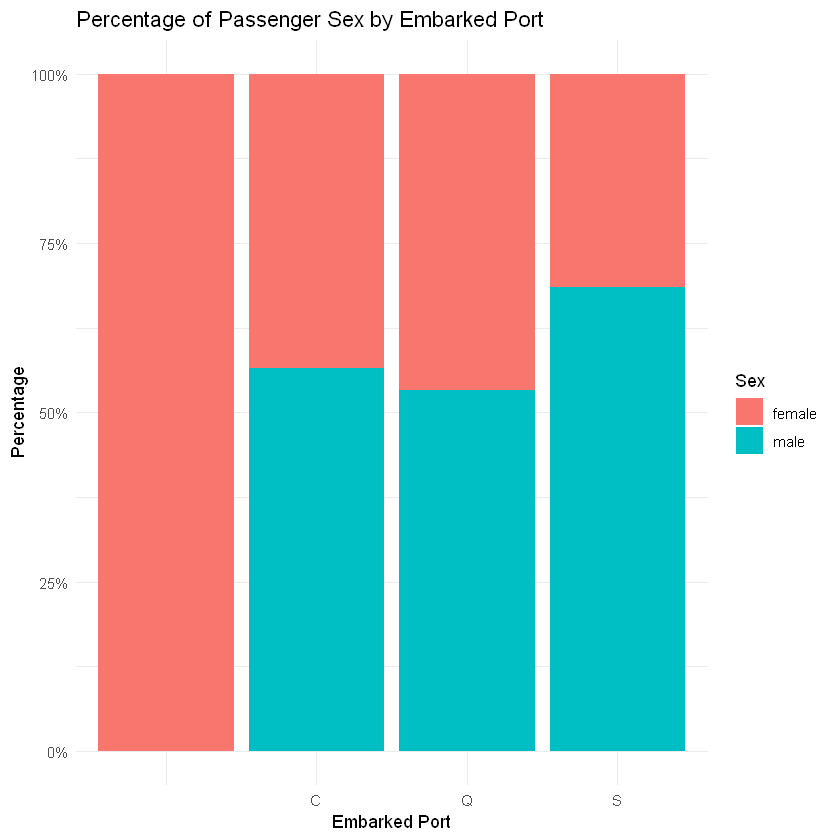

In [58]:
# Load the required libraries
library(ggplot2)

# Create the data for the plot
plot_data <- df %>% 
  group_by(Embarked, Sex) %>% 
  summarise(count = n()) %>%
  mutate(percentage = count / sum(count) * 100)

# Plot the percent stacked barplot
ggplot(plot_data, aes(x = Embarked, y = percentage, fill = Sex)) +
  geom_bar(stat = "identity", position = "fill") +
  labs(title = "Percentage of Passenger Sex by Embarked Port",
       x = "Embarked Port",
       y = "Percentage",
       fill = "Sex") +
  scale_y_continuous(labels = scales::percent_format()) +
  theme_minimal()